# Problem Set 1

This problem set is meant to help you familiarize yourself with Python and Pandas. This is meant to be a very gentle introduction -- if you find this problem set to be difficult, you might want to consider taking a more introductory course.

### Before You Start
For this problem set, you should download INF0251-PS1.ipynb from bCourses. Create a local copy of the notebook and rename it LASTNAME_FIRSTNAME-PS1.ipynb. Then edit your renamed file directly in your browser by typing:
```
jupyter notebook <name_of_downloaded_file>
```

Make sure the following libraries load correctly (hit Ctrl-Enter).


In [1]:
#IPython is what you are using now to run the notebook
import IPython
print("IPython version:      %6.6s (need at least 1.0)" % IPython.__version__)

# Numpy is a library for working with Arrays
import numpy as np
print("Numpy version:        %6.6s (need at least 1.7.1)" % np.__version__)

# SciPy implements many different numerical algorithms
import scipy as sp
print("SciPy version:        %6.6s (need at least 0.12.0)" % sp.__version__)

# Pandas makes working with data tables easier
import pandas as pd
print("Pandas version:       %6.6s (need at least 0.11.0)" % pd.__version__)

# Module for plotting
import matplotlib
print("Maplotlib version:    %6.6s (need at least 1.2.1)" % matplotlib.__version__)

# SciKit Learn implements several Machine Learning algorithms
import sklearn
print("Scikit-Learn version: %6.6s (need at least 0.13.1)" % sklearn.__version__)

from sklearn.linear_model import LinearRegression

IPython version:      7.22.0 (need at least 1.0)
Numpy version:        1.20.1 (need at least 1.7.1)
SciPy version:         1.6.2 (need at least 0.12.0)
Pandas version:        1.2.4 (need at least 0.11.0)
Maplotlib version:     3.3.4 (need at least 1.2.1)
Scikit-Learn version: 0.24.1 (need at least 0.13.1)


### Working in a group?
List the names of other students with whom you worked on this problem set:
- Molly Zhang
- Ben Fell

---

## Introduction to the assignment

For this assignment, you will be using the [Boston Housing Prices Data Set]( https://archive.ics.uci.edu/ml/machine-learning-databases/housing/).  Please read about the dataset carefully before continuing -- it is worth investing a few minutes up front otherwise you are likely to be hopelessly confused! Also, if you're new to analyzing data in Python, please make sure to read the relevant readings linked to on Canvas before beginning, otherwise you'll be stabbing in the dark.

You can read more about the dataset [here](http://lib.stat.cmu.edu/datasets/boston)

Use the following commands to load the dataset:


In [2]:
from sklearn.datasets import load_boston
bdata = load_boston()

The following commands will provide some basic information about the shape of the data:

In [3]:
print(bdata.keys())
print(bdata.feature_names)
print(bdata.data.shape)
print(bdata.target.shape)

# uncomment the following if you want to see a lengthy description of the dataset
print(bdata.DESCR)

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])
['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
(506, 13)
(506,)
.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to f

In [4]:
boston = pd.DataFrame(bdata.data)


In [5]:
boston.columns = bdata.feature_names[:]
print(boston.shape)

(506, 13)


---

## Part 1: Descriptive analysis

### 1.1: Explore the data

Let's dig into the data a bit to see what we're dealing with. The first thing to do is to make sure you understand how the data is organized, what the data types are, whether there is any missing data, and so forth. Get your bearings on your own, then answer the following questions.

 - 1.1.1: How many different variables are there in the dataset, and how many different observations?
 - 1.1.2: How many instances are classified as neighborhoods where the tract bounds the Charles River? 
 - 1.1.3: Show that dataset does not contain any missing values.
 - 1.1.4: Display the property tax rate in the 5 neighborhoods that have the highest median housing price.

In [6]:
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [7]:
#1.1.1
print('1.1.1')
print(len(boston.columns)) #variables
print(len(boston)) #observations

#1.1.2
print('\n' + '1.1.2')
print(boston.value_counts(boston['CHAS'])) #provides breakdown of count of each value of CHAS observations

#1.1.3
print('\n' + '1.1.3')
print(boston.isnull().sum()) #checking for null values

#1.1.4
print('\n' + '1.1.4')
boston['MEDV'] = bdata.target #adding MEDV as a column in boston dataframe
print(boston.sort_values(['MEDV'], ascending=False)['TAX'].head(5).values) #sorts dataframe by MEDV and returns top 5 values associated with TAX


1.1.1
13
506

1.1.2
CHAS
0.0    471
1.0     35
dtype: int64

1.1.3
CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64

1.1.4
[198. 307. 666. 666. 666.]


*Provide our answers below:*

 - 1.1.1: 13 variables, 506 observations
 - 1.1.2: 35
 - 1.1.3: all values are 0, so there are no missing values in the dataset
 - 1.1.4: 198.0, 307.0, 666.0, 666.0, and 666.0

### 1.2: Answer some basic questions
 - 1.2.1: What is the median housing price in Boston's most expensive neighborhood? (As far as ties are concerned, just use the top 5 values to break the ties)
 - 1.2.2: How many neighborhoods have, on average, less than 3 rooms per dwelling?
 - 1.2.3: What is the property tax rate in the least expensive neighborhood that is also adjacent to the Charles River?
 - 1.2.4: What is the crime rate in the neighborhood with the highest median housing price? 
 - 1.2.5: What is the crime rate in the neighborhood with the lowest median housing price?


In [8]:
#1.2.1
print("1.2.1")
print(boston.sort_values(['MEDV'], ascending=False)['MEDV'].head(5).values) #sorts dataframe by MEDV and returns top 5 values associated with MEDV

#1.2.2
print('\n' + '1.2.2')
print(boston['RM'][boston['RM'] < 3].count()) #counts the values less than 3 in the RM column

#1.2.3
print('\n' + '1.2.3')
print(boston[boston.sort_values(['MEDV'], ascending = True)['CHAS'] == 1].head(1)['TAX']) #sorts dataframe by MEDV(ascending) and only includes values where CHAS == 1. Returns TAX value associated with top entry

#1.2.4
print('\n' + '1.2.4')
print(boston.sort_values(['MEDV'], ascending=True).tail(5)['CRIM']) #sorts dataframe by MEDV(ascending) and returns CRIM value associated with last entry

#1.2.5
print('\n' + '1.2.5')
print(boston.sort_values(['MEDV'], ascending=True).head(5)['CRIM']) #sorts dataframe by MEDV(ascending) and returns CRIM value associated with first entry


1.2.1
[50. 50. 50. 50. 50.]

1.2.2
0

1.2.3
142    403.0
Name: TAX, dtype: float64

1.2.4
166    2.01019
195    0.01381
283    0.01501
225    0.52693
186    0.05602
Name: CRIM, dtype: float64

1.2.5
398    38.35180
405    67.92080
400    25.04610
399     9.91655
414    45.74610
Name: CRIM, dtype: float64


<ipython-input-8-e29994c5ff42>:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print(boston[boston.sort_values(['MEDV'], ascending = True)['CHAS'] == 1].head(1)['TAX']) #sorts dataframe by MEDV(ascending) and only includes values where CHAS == 1. Returns TAX value associated with top entry


*Provide our answers below:*

 - 1.2.1: 50 (in thousands, so really $50,000)
 - 1.2.2: 0
 - 1.2.3: 403.0
 - 1.2.4: 0.05602
 - 1.2.5: 38.3518

### 1.3: Summary statistics

Create a clean, organized table that shows just the following information (no more, no less) for each variable in the dataset. Note that your table should have K rows (one for each variable) and 7 columns, ordered as below:
 - The name of the variable
 - The number of observations with non-missing values
 - The mean of the variable
 - The standard deviation of the variable
 - The minimum value of the variable
 - The median of the variable
 - The maximum value of the variable

In [9]:
boston.describe(percentiles=[.5]).T

,count,mean,std,min,50%,max
CRIM,506.0,3.613524,8.601545,0.00632,0.25651,88.9762
ZN,506.0,11.363636,23.322453,0.00000,0.00000,100.0000
INDUS,506.0,11.136779,6.860353,0.46000,9.69000,27.7400
CHAS,506.0,0.069170,0.253994,0.00000,0.00000,1.0000
NOX,506.0,0.554695,0.115878,0.38500,0.53800,0.8710
RM,506.0,6.284634,0.702617,3.56100,6.20850,8.7800
AGE,506.0,68.574901,28.148861,2.90000,77.50000,100.0000
DIS,506.0,3.795043,2.105710,1.12960,3.20745,12.1265
RAD,506.0,9.549407,8.707259,1.00000,5.00000,24.0000
TAX,506.0,408.237154,168.537116,187.00000,330.00000,711.0000


### 1.4 Simple statistical tests

Is the median house value in locations that are adjacent to the Charles River different from the median house value in locations that are not adjacent to the Charles River? Use a t-test to answer this question. Clearly state the null and alternative hypothesis for your test.

In [10]:
from scipy.stats import ttest_ind

print(boston.groupby('CHAS').mean())

val1 = boston[boston['CHAS']==1]
val2 = boston[boston['CHAS']==0]

ttest_ind(val1['MEDV'], val2['MEDV'])


          CRIM         ZN      INDUS       NOX        RM        AGE       DIS  \
CHAS                                                                            
0.0   3.744447  11.634820  11.019193  0.551817  6.267174  67.911677  3.851915   
1.0   1.851670   7.714286  12.719143  0.593426  6.519600  77.500000  3.029709   

           RAD         TAX    PTRATIO           B      LSTAT       MEDV  
CHAS                                                                     
0.0   9.566879  409.870488  18.527176  355.461040  12.757941  22.093843  
1.0   9.314286  386.257143  17.491429  372.997429  11.241714  28.440000  


Ttest_indResult(statistic=3.996437466090509, pvalue=7.390623170519905e-05)

Null: The median house value means between the locations adjacent to the Charles River verses the locations not adjacent are equal.
Alternative: The median house value means between the locations adjacent to the Charles River verses the locations not adjacent are not equal.

P-value is less than .05, so we reject our null hypothesis that the means between the two groups are equal.

### 1.5 Simple Linear Regression

Estimate a linear regression of housing value (the dependent variable) on "% lower status of the population" (the independent variable), with no other control variables. Interpret the coefficients and standard errors. Interpret the R2 value. Based on this evidence, can you conclude anything about the causal effect of increasing the "% lower status of the population" on housing value?

In [11]:
import statsmodels.api as sm #import statsmodels 

X = boston["LSTAT"]
y = boston["MEDV"]
X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     601.6
Date:                Tue, 25 Jan 2022   Prob (F-statistic):           5.08e-88
Time:                        15:17:34   Log-Likelihood:                -1641.5
No. Observations:                 506   AIC:                             3287.
Df Residuals:                     504   BIC:                             3295.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         34.5538      0.563     61.415      0.000      33.448      35.659
LSTAT         -0.9500      0.039    -24.528      0.000      -1.026      -0.874
==============================================================================
Omnibus:                      137.043   Durbin-Watson:                   0.892
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              291.373
Skew:                           1.453   Prob(JB):                     5.36e-64
Kurtosis:                       5.319   Cond. No.                         29.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

 Interpret the coefficients and standard errors. Interpret the R2 value. Based on this evidence, can you conclude anything about the causal effect of increasing the "% lower status of the population" on housing value?

The slope coefficient is -0.9500. The p value for this coefficient is 0.000, which is statistically significant at alpha equal to .05 because 0 is less than .05. Because our LSTAT coefficient is statistically significant and our coefficient estimate is negative, we can predict that a one unit increase in LSTAT will result in a 0.9500 decrease in MEDV. The standard error of the LSTAT coefficient is small (.039), so our coefficient estimate is precise. Our intercept coefficient is the expected value of MEDV with no LSTAT impact, and the standard error is larger than the standard error of LSTAT, so our estimate of the intercept coefficient is less precise. Our R-squared value indicates that LSTAT explains 54.4% of the variance in MEDV.

---

## Part 2: Histograms and Boxplots


### 2.1: Histogram of housing prices

Below you will find some very basic code to make a very basic histogram of median housing prices (the "target" variable) for your dataset.  Your first task is to make this graph look pretty by doing the following:

1. Add appropriate labels to the x and y axes, make sure to include units
2. Change the bin width on the histogram to be $1000
3. Remove the axes on the top and right side of the plot window
4. Change the color of the bars to be green, and remove the black borders from the bars


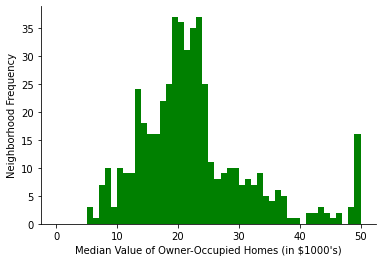

In [12]:
# prepare IPython to work with matplotlib and import the library to something convenient
# %matplotlib inline  
import matplotlib.pyplot as plt  

# edit the code below to make the graph look good
x = np.arange(0,51,1)
plt.hist(bdata.target, edgecolor= None, bins = x, color='green')
plt.xlabel("Median Value of Owner-Occupied Homes (in $1000's)")
plt.ylabel("Neighborhood Frequency")
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()

### 2.2: Boxplot of housing prices

Create a **horizontal** boxplot that shows the distribution of the median value of houses (y-axis) that are adjacent to the Charles river and the houses that are not adjacent to the Charles rivers. Properly label your axes, and make sure that your graphic looks polished and professional.

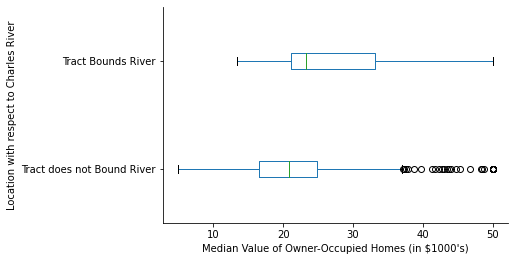

In [13]:
boston.boxplot(column='MEDV', by='CHAS', vert = False, grid = False)
plt.xlabel("Median Value of Owner-Occupied Homes (in $1000's)")
plt.ylabel("Location with respect to Charles River")
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().set_title("")
plt.suptitle("")
plt.yticks([1,2],labels=["Tract does not Bound River", "Tract Bounds River"])
plt.show()

### 2.3: Interpret

What do you observe in the above boxplots? Explain in terms of the various elements of the distribution. Does there appear to be a difference between distribution of the median housing prices adjacent to Charles river and the ones not adjacent to Charles river? 

It appears that the median of the home values in the group of neighborhoods that do not bound the river is lower than the interquartile range of the group of neighborhoods that do bound the river. This means there is likely to be a difference between the two groups. The range between the minimum and maximum values for each plot appear to be approximately equal, although the minimum and maximum values for the group not bounding the river is lower than the minimum and maximum values for the group bounding the river. However, there appear to be many outliers with higher median home values where the tract does not bound the river. The shorter box for the group that is not adjacent to the Charles River impled that the data is less variable, as more data falls within a lower range comparatively to the adjacent group.

### 2.4 Correlation Matrix

Calculate the correlation of every pair of variables in the dataset. Create a *K* x *K* matrix where the value in the (*i*,*j*) cell is the correlation between the *i*th and *j*th variable. Show off your skills by coloring the cell so that large positive correlations appear green and large negative correlations appear red (use a gradient to make this pretty). What two variables appear to me most positively and negatively correlated?

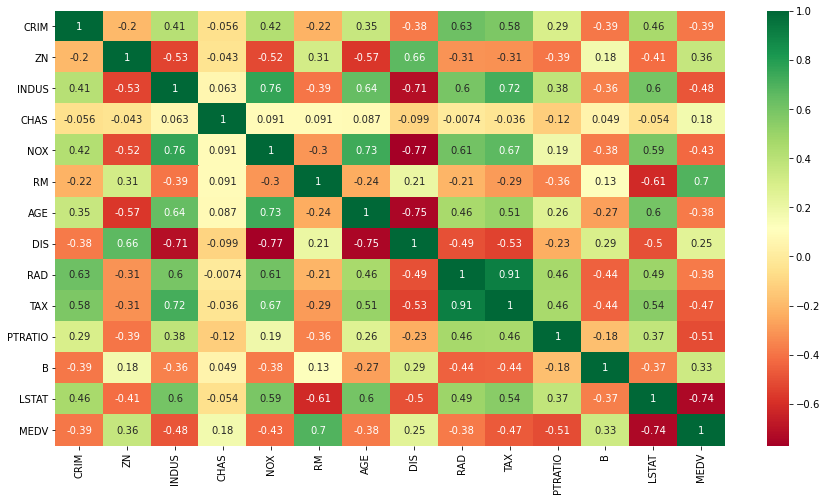

In [14]:
import seaborn as sn

corrMatrix = boston.corr()
sn.heatmap(corrMatrix, annot=True, cmap="RdYlGn")
plt.gcf().set_size_inches(15, 8)
plt.show()

The most positively correlated variables are TAX and RAD.
The most negatively correlated variables are NOX and DIS.

### 2.5 Create your own (creative and effective) visualization

Use another type of graph or chart to illustrate an interesting pattern in the data.  Be creative in your visualization, and make sure to produce a "publication-quality" graph.  Points will be given for useful and creative graphs; points will be deducted for confusing issues like unlabeled axes.  If you're new to data visualization, [this guide](http://pubs.aeaweb.org/doi/pdfplus/10.1257/jep.28.1.209) is a good place to start.

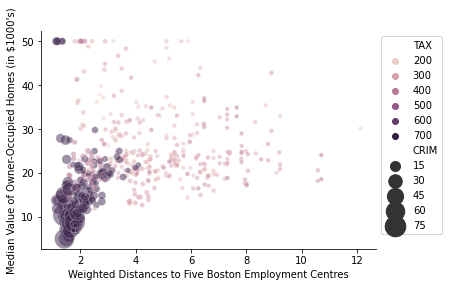

In [15]:
sn.scatterplot(data=boston, x="DIS", y="MEDV", size="CRIM", hue="TAX", legend=True, alpha=0.5, sizes=(20, 500))
plt.xlabel("Weighted Distances to Five Boston Employment Centres")
plt.ylabel("Median Value of Owner-Occupied Homes (in $1000's)")
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', fontsize=10)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
#plt.legend(title='Smoker', loc='upper left', labels=['Hell Yeh', 'Nah Bruh'])
plt.show()

Visualization displays the reltionship between home prices and the distance to employment centers along with the crime and tax rates for each neighborhood. We can see that higher tax and crime rates occur closer to the employment centers and for lower value homes.